In [56]:
import numpy as np
#import matplotlib as mpl
#mpl.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
from math import sqrt

In [57]:
lines = !! grep -e "--->" example-stdout-weather.txt
llgp = [line.split() for line in lines]
nruns = 5
ms = [int(line[4]) for line in llgp]
skip = len([m for m in ms if m <= 304])# too small, scale is bad in picture
ms = ms[skip:]
times = [float(line[6]) for line in llgp][skip:]
se_times = [float(line[8][:-1]) / sqrt(nruns) for line in llgp][skip:]
smses = [float(line[10]) for line in llgp][skip:]
nlpds = [float(line[14]) for line in llgp][skip:]
se_nlpds = [float(line[16][:-1]) / sqrt(nruns) for line in llgp][skip:]

In [58]:
smses

[0.0895, 0.0895, 0.0895, 0.0895, 0.0895, 0.0895, 0.0895]

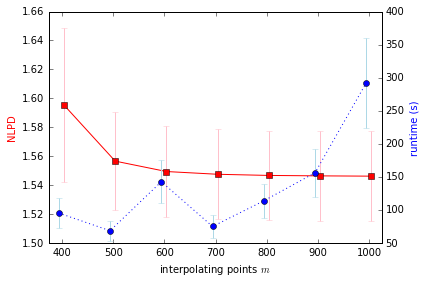

In [67]:
fig, ax1 = plt.subplots()
ax1.errorbar(ms, nlpds, yerr=se_nlpds, c='r', marker='s', ecolor='pink')
ax1.set_ylabel('NLPD', color='r')
ax1.set_xlabel(r'interpolating points $m$')
ax2 = ax1.twinx()
jittered_ms = [m - 10 for m in ms]
ax2.errorbar(jittered_ms, times, yerr=se_times, c='b', marker='o', ls=':', ecolor='lightblue')
ax2.set_ylabel('runtime (s)', color='b')
ax2.set_xlim([min(ms) - 30, max(ms) + 20])

fig.tight_layout()
plt.savefig('m_time_nlpd.eps', format='eps', bbox_inches='tight')
plt.show()